In [249]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'


taco_data = pd.read_csv("./tacos.csv") 
cols = [c for c in taco_data.columns if c.lower()[0:7] != ('unnamed')]

taco_data=taco_data[taco_data['country'].str.contains('US')]

# print(taco_data['menus.amountMax'])
taco_data = taco_data[["city","country", "menus.currency", "menus.name", "province","menus.amountMax","menus.amountMin","menus.description", "name"]]
taco_data = taco_data.rename(columns={'menus.amountMax': 'price_max', 'menus.amountMin': 'price_min',"menus.description": "description", "name": "restaurant"})

taco_data['menus.currency'] = "USD"
taco_data['menus.name'] = taco_data["menus.name"].str.lower()
taco_data['province'] = taco_data["province"].str.upper()

# SEPERATE TACOS AND BURRITOS
tacos = taco_data[taco_data["menus.name"].str.contains("taco")]
burritos = taco_data[taco_data["menus.name"].str.contains("burrito")]

# USE STATE ABBREVS
tacos = tacos[tacos["province"].str.len() == 2]
burritos = burritos[burritos["province"].str.len() == 2]

# REMOVE WEIRD STATES
tacos = tacos[tacos['province'] != 'LS']
tacos = tacos[tacos['province'] != 'VI']
tacos = tacos[tacos['province'] != 'DC']


# LIST OF NORTHERN STATES
north = ['WA', 'OR', 
         'ID', 'MT', 
         'WY', 'NE', 
         'SD', 'ND', 
         'MN', 'IA', 
         'MO', 'IL' ,
         'WI','IN',
         'KY','WV',
         'VA','MD',
         'NJ','CT',
         'RI','PA',
         'OH','NY',
         'DE','NH',
         'ME','VT',
         'MA','CT', 'AL']

south = ['CA', 'NV', 
         'UT', 'AZ', 
         'CO', 'NM', 
         'KS', 'OK', 
         'TX', 'AR', 
         'LA', 'HI', 
         'TN', 'MS', 
         'AL', 'GA', 
         'FL', 'SC', 
         'NC']

north_burrito = burritos[~burritos['province'].isin(south)]
south_burrito = burritos[burritos['province'].isin(south)]

tacos_north = tacos[tacos['province'].isin(north)]
tacos_south = tacos[~tacos['province'].isin(north)]


taco_data.dtypes

city               object
country            object
menus.currency     object
menus.name         object
province           object
price_max         float64
price_min         float64
description        object
restaurant         object
dtype: object

## VISUALIZE TACOS AND BURRITOS 

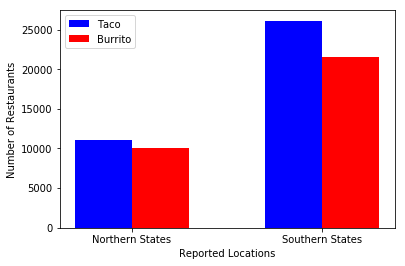

In [243]:
x = ["Northern States", "Southern States"]
barwidth=0.3
nums = [len(tacos_north), len(tacos_south)]
plt.bar(x, nums, width=-barwidth,color="b", align='edge')
plt.xlabel("Reported Taco Locations")
plt.ylabel("Number of Restaurants with Tacos")
# plt.show()

# x = ["North", "South"]

## FIND WHAT TYPES OF TACOS ARE MOST SERVED IN THE US

160 651 238 366


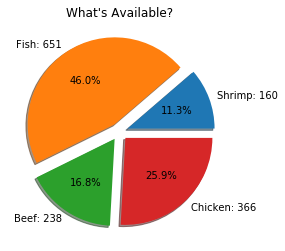

In [246]:
# CLEANED NAN PRICES
tacos = tacos[np.isfinite(tacos['price_max'])]
tacos = tacos[np.isfinite(tacos['price_min'])]
ingredients = tacos[~tacos['description'].isnull()]

pd.options.mode.chained_assignment = None  # default='warn'
# CREATE TACO CATEGORIES
shrimp_tacos = ingredients[ingredients["menus.name"].str.contains(" shrimp ") 
                           | ingredients["menus.name"].str.contains(" camaron ")]

fish_tacos = ingredients[ingredients["menus.name"].str.contains(" fish ") 
                         | ingredients["menus.name"].str.contains(" pescado ")]

beef_tacos = ingredients[ingredients["menus.name"].str.contains(" beef ") 
                         | ingredients["menus.name"].str.contains(" steak ")]

chicken_tacos = ingredients[ingredients["menus.name"].str.contains(" chicken ") 
                            | ingredients["menus.name"].str.contains(" pollo ")]

# MAKE NAMES EASIER TO FIND   
shrimp_tacos['menus.name'] = "shrimp tacos"
fish_tacos['menus.name'] = "fish tacos"
beef_tacos['menus.name'] = "beef tacos"
chicken_tacos['menus.name'] = "chicken tacos"

# GET ROW COUNTS FOR TACO TYPES
shrimp_row, shrimp_col = shrimp_tacos.shape
fish_row, fish_col = fish_tacos.shape
beef_row, beef_col = beef_tacos.shape
chicken_row, chicken_col = chicken_tacos.shape


print(shrimp_row, fish_row, beef_row, chicken_row)

labels = ["Shrimp: "+str(shrimp_row), 
          "Fish: "+str(fish_row), 
          "Beef: "+str(beef_row),
          "Chicken: "+str(chicken_row)]

explode = [0.1, 0.1, 0.1, 0.1]
plt.title("What's Available?")
plt.pie([shrimp_row, fish_row, beef_row, chicken_row], labels=labels, explode=explode, autopct='%1.1f%%',shadow=True)
plt.show()

10527
Gambino's Pizza
Diablo Grande Golf & Country Club
Mcdonald's
Baja Fresh Mexican Grill
Java Joe's
Mago Grill & Cantina - South Barrington
McDonald's
Riff's Joint
Taqueria Las Comadres
The Chicken Coop
Sonic Drive-In
La Bamba
Falbo Bros Pizzeria
The City Squire
Fish Market Maui
Okko Hilton Head
Maki Yaki
Diablitos
Hooters of Burbank
METRO
Long John Silver's
Casey's General Store
Rosy Tomorrows
Abners Casual Dining
Subway
Jackson Hall American Bar & Grille
Taco Bell
Mayslack's
Casa Maya Grill
Packard's New American Kitchen
New England House of Pizza
Jack In The Box
El Pollo Loco
Sonic Drive In
Walker's Grille
El Mariachi
Flo
Guadalupe's Restaraunt
Hooters
Denny's
Rockin' Baja Lobster - Newport Beach
Kiku Japanese Steak & Seafood House
Cilantro Mexican Grill
Mcdonalds
Hale's Restaurant & Lounge
The Eclectic Cafe
Carl's / Green Burrito
Downtown Gyros
Mel's Drive-In
Kiki's Restaurant
French Meadow Cafe & Bluestem Bar
The ParkView NiteClub
Baja Fresh
Mebane Downtown Table
Los Arcos
Tako

Shrimper's Grill & Raw Bar
Marisa's Mexican Restaurant
Skillets Family Cafe
Blackbird
Together Korean
Carl's Jr
Fiesta Ranchera
Frontier
The Ranch House
Mission Bar & Grill
Flatlander Market
Josun Korean Bbq
Nikki's Gourmet & Sushi
Cabana Sam’s Sunset Bay Grill
The Resturant at The Standard Hotel
Bend Brewing Company
Prairie Moon
On A Roll Cafe
The Delectable Egg
Hp Cafe
Marco's Mexican Taqueria
Sam's Sandwiches & Coffee
Papa Jack's Pizza
Moonlight Cafe
Fiesta Mexican Grill
Cleveland Chop
The Bedford Village Inn
Los Compas
Giuseppi's Pizza Pasta
Montecristo Mexican Grill
Cocula Restaurant
Jumburrito
Riverside Cafe
Indigo Crow
Cactus Blue
M��s Mexican Restaurant
Cabrera's Mexican Cuisine
Rancho Viejo
Marcus Cafe
Red Fish - Bluffton
The Corner
The Trough Sandwich Kitchen
Fuego Tortilla Grill
Cafe Des Amis
Boone's Tavern
Carl's Jr. / Green Burrito
Little Sami's
Enso Japanese Bar
Pizza Corral
Oscar's Taco Shop
Mosaic Restaurant & Lounge - Four Points By Sheraton
Rookies Restaurant & Sports

Andal�� Mexican Restaurant
Abuelo's - Tulsa
59 Diner
Pizza Gallery
Moulton's Market
Field of Greens
Los Pinos Taco Shop
Taco Bell/ Long John Silver's
The Morning Times
Rudy's Tacos
Tequila Museo Mayahuel
Tacos Sinaloa #2
Uptown Cafe
Quench!
Gladstones
Wako Roll
Ponchos
Flippers on the Bay
The Bungalow Bar
Rincon Mexicano
Painters
Legend's
Sushi HaYaShi
86 West
La Cabana Restaurant
Que Mas
J Gardellas Tavern
Don Tito
Sunnyside Catering and Cafe
Taqueria El Buen Gusto
Coyote Blue
Olde Port Inn
Sunset Pub & Grill
Port Restaurant & Bar
Hot Head Burritos
The Mill on MacArthur
Country hills liquor and deli
Moore's Delicatessen
El Taquito Restaurant #2
Altitude Restaurant
Mexico au Parc
Mi Amigo's Mexican Grill
Mission Bay Foods
Panzano Pizzeria
The Yard Gastropub Shadyside
Shakey's Pub Grub
Hammerhead Fred's
Picnikins Patio Cafe
Jubranos
La Mina
The Village Pub at Venetian Village
Guadalajara Restaurant
Different Pointe Of View
Mirador - Lodge At Cordillera
Ortega's Mexican Bistro
Main Drago

Just
Ostioneria Michoacan Seafood/oyster Bar
Monica's Mexican Restaurant
Guru's
The Blues Bbq Co
El Sombrero
Time Out Sports Tavern
Mexxi's Taqueria
Bell Tower Bistro & Patisserie
We-Ko-Pa Golf Club
Taco Boy
Miyako's
Hangar 19
Bonfire Wood Fire Cooking
La Casa de los Alambres
Venice Pizza & Pasta
The Local Taco
Riccardi's Italian Restaurant
Zocalo Restaurant And Bar
D-ray's Burgers and Dogs
Sticky Lips BBQ Juke Joint
Big Smith's Bar-b-q Catfish & Catering
Sweet Savory
Vinotopia
Ernesto's Mexican Restaurant
Maui Taco
Beachwood Cafe
Josey's Restaurant
La Ristra
Crystal Mountain Hotels
Windy Corner Market
Silver Spur Texas Smokehouse BBQ
ChickeNuevo
Nahm Thai Cuisine
Goddess and Grocer
The Wharf Express
Swine
Don Panchos Taco Shop
Agave Bar & Grill
Gabby's Cafe
Asaka Sushi & Grill
Cactus Jack's
Roof Garden At The Peninsula Hotel
Jersey's Bar & Grill
The Kennebunk Inn
Yuki Hana Japanese Fusion
Slo-Jack's Drive-In
Bandaloop
Hyperion Public - Silver Lake
Kona Coffee Cafe
Margaritaville
The P

Townie
Mexicali Rose
El Nuevo Tampico
9er's Grill
California Roll & Sushi Fish
On The Alley
Fireside Restaurant & Tavern
Agave Del Mar
North Beach Bar and Grill
Taco Rosa
La Huasteca Taqueria and Catering
Kt's Roadhouse
Dreams Cafe & Lounge
Northside Cafe
The Kitchen
La Pearla Delicatessen
Taqueria El Ranchito
Scooter's Restaurant & Bar
Los Alamos
Los Faroles
Miguel's Cantina
Laylah's Patties & Jerk
The National
GoodFellas Cafe
Taco Plus
Restaurant Mexico Garibaldi
Matthew's 1600
Kc's Sushi Tv Bar & Grill
Meson Olé!
Off The Vine
El Rinconcito 2
Cheebo
Zest Cafe
Off Trax
Jojutlas Mexican Grill
Pietro's Pizza Pirate Adventure
Urban Cantina
Ale Mary's
Riverside Brewery & Restaurant
Sol y Luna
Stuft Burger Bar
El Charro Mexican Restaurant
Rocking Horse Cafe
Tacos Locos
Super Cuca's
T & B Grill
Rancho Bravo Tacos
Winchell's Pub & Grill
Liberty Union Bar and Grill
Burnsley Dining Room and Lounge
Ohjah Hibachi & Sushi
The Oceanaire
Sam's Chicken & Ribs
Los Chingones Dtc
Taqueria La Cumbre
Boo